### Perceptrons - Training

Note for 717005@ Hallym University !

* Make a prediction with weights

In [0]:
def predict(X, w):
    bias = w[0]
    activation = bias + w[1]* X[0] + w[2]* X[1]
    if activation >= 0.0:
        return 1.0
    else:
        return 0.0

* Estimate Perceptron weights using stochastic gradient descent

In [0]:
def train_weights(train, l_rate, n_epoch):
    #weights = [0.0 for i in range(len(train[0]))]
    weights = [0,0,0]
    print(weights)
    print('----------------------------')
    
    vb=[]
    vw0=[]
    vw1=[]
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train: #데이터에서 한줄씩 꺼내서 씀
            prediction = predict(row, weights)
            corr = row[-1]
            error = corr - prediction
            sum_error += error**2
            
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                
            vb.append(weights[0])
            vw0.append(weights[1])
            vw1.append(weights[2])
            
        print('epoch={}, error={}'.format(epoch, sum_error))
    return weights, vb, vw0, vw1                                   #vb,vw0,vw1 return 과정 필요

In [0]:
# training set
dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]

* Hyperparameters

하이퍼파라미터

사람이 정해주는 

In [0]:
l_rate = 0.1
n_epoch = 5

In [0]:
weights, vb, vw0, vw1 = train_weights(dataset, l_rate, n_epoch)

[0, 0, 0]
----------------------------
epoch=0, error=2.0
epoch=1, error=1.0
epoch=2, error=0.0
epoch=3, error=0.0
epoch=4, error=0.0


In [0]:
print(weights)

[-0.1, 0.20653640140000007, -0.23418117710000003]


In [0]:
prediction = predict([3,2], weights)
print(prediction)

1.0


In [0]:
import matplotlib.pyplot as plt

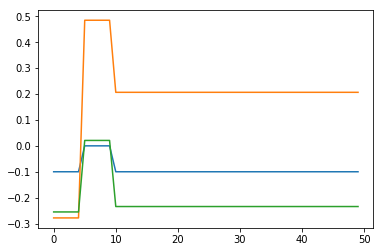

In [0]:
plt.plot(vb)
plt.plot(vw0)
plt.plot(vw1)

* Why ?

partial derivative with respect to m

$$ \frac{\partial J(m,b)}{\partial m} =  \frac{1}{n}\sum_{i=1}^{n} -2 x^{(i)} (y_{i}-(mx^{(i)} + b)) \\
= \frac{2}{n}\sum_{i=1}^{n} x^{(i)} ((mx^{(i)} + b)-y^{(i)}) \\
= \frac{2}{n}\sum_{i=1}^{n} x^{(i)} (\hat{y}^{(i)} -y^{(i)})$$

In [0]:
#m으로 미분했을때 x가 남음

partial derivative with respect to b

$$ \frac{\partial J(m,b)}{\partial b} =  \frac{1}{n}\sum_{i=1}^{n} -2  (y^{(i)}-(mx^{(i)} + b)) \\
= \frac{-2}{n}\sum_{i=1}^{n}  (y^{(i)}-(mx^{(i)} + b)) \\
= \frac{2}{n}\sum_{i=1}^{n}  (\hat{y}^{(i)}-y^{(i)}) \\ $$


In [0]:
#반면 b로 미분했을땐 b 부분이 1이되어 다른부분은 전부 사라짐

Partial derivatives : https://www.mathsisfun.com/calculus/derivatives-partial.html

* References

```
https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/
```